# $\text{DoWhy}$

In [3]:
import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
import dowhy.datasets

## $\text{Getting Started}$

In [14]:
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5, # W
    num_instruments = 2, # Z
    num_effect_modifiers=1, # X
    num_samples=10000,
    treatment_is_binary=True, # V
    num_discrete_common_causes=1) # C


df = data["df"]
df

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,-0.057894,1.0,0.490845,-0.795283,0.655019,0.130652,0.486094,2,True,14.947092
1,0.867360,1.0,0.724302,1.308285,-1.105060,-0.147760,-0.877139,1,True,12.067803
2,0.596841,1.0,0.523463,0.110889,1.595940,0.070054,-0.679999,3,True,22.262474
3,1.706458,1.0,0.477797,-0.481661,0.357520,-0.257190,1.142493,2,True,18.991358
4,-0.709575,1.0,0.430195,0.473982,0.830187,0.497630,2.094308,3,True,19.207009
...,...,...,...,...,...,...,...,...,...,...
9995,1.235469,1.0,0.043224,0.171696,0.408000,2.089069,0.992548,0,True,21.349396
9996,1.579802,1.0,0.466661,-1.054698,0.703912,2.541972,1.406460,0,True,22.853810
9997,1.865714,1.0,0.636700,0.748653,1.561610,-1.635754,-2.635736,2,True,19.381889
9998,-0.590788,1.0,0.611387,3.075219,-0.692854,2.692014,-0.486487,0,True,17.817361


In [5]:
model=CausalModel(
    data = df,
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']


INFO:dowhy.causal_graph:Using Matplotlib for plotting


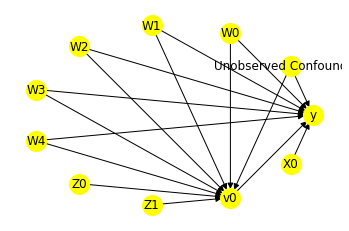

In [20]:
model.view_model()
#from IPython.display import Image, display
#display(Image(filename="causal_model.png"))

In [23]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['W2', 'W3', 'W4', 'W0', 'W1', 'Unobserved Confounders']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:['Z1', 'Z0']


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W2,W3,W4,W0,W1))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W2,W3,W4,W0,W1,U) = P(y|v0,W2,W3,W4,W0,W1)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)



In [24]:
causal_estimate = model.estimate_effect(
    identified_estimand, 
    method_name="backdoor.propensity_score_stratification")

print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W2+W3+W4+W0+W1
C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
INFO:numexpr.utils:NumExpr defaulting to 4 threads.


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W2,W3,W4,W0,W1))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W2,W3,W4,W0,W1,U) = P(y|v0,W2,W3,W4,W0,W1)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

## Realized estimand
b: y~v0+W2+W3+W4+W0+W1
Target units: ate

## Estimate
Mean value: 9.974596952956894

Causal Estimate is 9.974596952956894


In [26]:
causal_estimate_att = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.propensity_score_stratification",
    target_units = "atc")

print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

INFO:dowhy.causal_estimator:INFO: Using Propensity Score Stratification Estimator
INFO:dowhy.causal_estimator:b: y~v0+W2+W3+W4+W0+W1
C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W2,W3,W4,W0,W1))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W2,W3,W4,W0,W1,U) = P(y|v0,W2,W3,W4,W0,W1)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

## Realized estimand
b: y~v0+W2+W3+W4+W0+W1
Target units: atc

## Estimate
Mean value: 10.060982132412262

Causal Estimate is 10.060982132412262


## $\text{Do-sampler Introduction}$

In [29]:
import dowhy.api

z = np.random.uniform(size=5000)
d = np.random.binomial(1., p=1./(1. + np.exp(-5. * z)))
y = 2. * z + d + 0.1 * np.random.normal(size=5000)

df = pd.DataFrame({'Z': z, 'D': d, 'Y': y})

In [31]:
(df[df.D == 1].mean() - df[df.D == 0].mean())['Y']

In [32]:
causes = ['D']
outcomes = ['Y']
common_causes = ['Z']

model = CausalModel(df, causes, outcomes, common_causes=common_causes)

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['D'] on outcome ['Y']


In [34]:
identification = model.identify_effect(proceed_when_unidentifiable=True)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Z', 'U']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


In [37]:
from dowhy.do_samplers.weighting_sampler import WeightingSampler

sampler = WeightingSampler(df, causal_model=model, keep_original_treatment=True,
                           variable_types={'D': 'b', 'Z': 'c', 'Y': 'c'})

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['Z', 'U']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


In [38]:
interventional_df = sampler.do_sample(None)
(interventional_df[interventional_df.D == 1].mean() - interventional_df[interventional_df.D == 0].mean())['Y']

## $\text{Confounding Example: Finding causal effects from observed data}$

In [39]:
rvar = 1 if np.random.uniform() >0.5 else 0
data_dict = dowhy.datasets.xy_dataset(10000, effect=rvar, sd_error=0.2)
df = data_dict['df']
print(df[["Treatment", "Outcome", "w0"]].head())

   Treatment   Outcome        w0
0   4.113433  7.786004 -2.035039
1   4.823352  9.236335 -1.319645
2   2.612494  5.554578 -3.176110
3   2.514493  5.758213 -3.184160
4   1.894435  4.077183 -3.997425


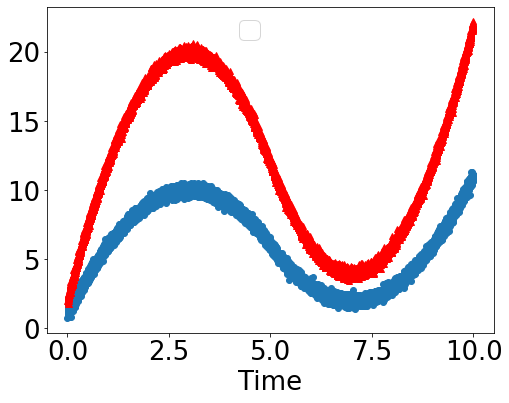

In [41]:
import dowhy.datasets, dowhy.plotter
dowhy.plotter.plot_treatment_outcome(df[data_dict["treatment_name"]], 
                                     df[data_dict["outcome_name"]],
                                     df[data_dict["time_val"]])

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['Treatment'] on outcome ['Outcome']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


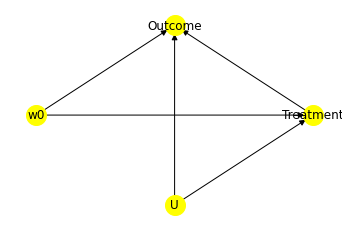

In [43]:
model= CausalModel(
        data=df,
        treatment=data_dict["treatment_name"],
        outcome=data_dict["outcome_name"],
        common_causes=data_dict["common_causes_names"],
        instruments=data_dict["instrument_names"])
model.view_model(layout="dot")

In [44]:
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['w0', 'U']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                               
────────────(Expectation(Outcome|w0))
d[Treatment]                         
Estimand assumption 1, Unconfoundedness: If U→{Treatment} and U→Outcome then P(Outcome|Treatment,w0,U) = P(Outcome|Treatment,w0)
### Estimand : 2
Estimand name: iv
No such variable found!



## $\text{Pre-Class Work}$
### $\text{Part I}$

In [48]:
#link = 'https://raw.githubusercontent.com/IBM-HRL-MLHLS/IBM-Causal-Inference-Benchmarking-Framework/'
#IMB_benchmark = pd.read_csv(link+'master/data/LBIDD/x.csv')

In [ ]:
IBM_benchmark.head()

In [ ]:
model=CausalModel(
    data = IBM_benchmark,
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

In [ ]:
model.view_model()

### $\text{Part II}$

To test your DoWhy knowledge, make a fake dataset that follows Figure 3.12 from the textbook, and try to follow the tutorials to estimate the effect. Write down any complications you had along the way.

![graph.png](https://raw.githubusercontent.com/Tahahaha7/Causal_Inference_Tutorial/master/graph.png)

In [68]:
#Generate the dataset
data = dowhy.datasets.linear_dataset(beta=10,
        num_treatments=1,
        num_common_causes=2,
        num_samples=10000,
        treatment_is_binary=False,
        outcome_is_binary=True,
        num_discrete_common_causes=1)

df = data["df"]
df.columns = ["income", "gender", "qualifications", "hiring"]
df.head()

,income,gender,qualifications,hiring
0,-1.822610,2,-2.813148,False
1,-0.717591,2,0.544796,True
2,-0.715600,3,2.476015,True
3,-0.669814,0,-2.392665,False
4,0.857444,0,2.344705,True


INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['qualifications'] on outcome ['hiring']
INFO:dowhy.causal_graph:Using Matplotlib for plotting


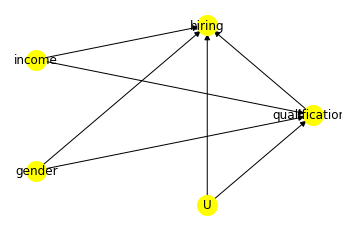

In [69]:
#Define the model
model= CausalModel(
        data=df, 
        treatment="qualifications",
        outcome="hiring",
        common_causes=["income", "gender"])

model.view_model(layout="dot")

In [61]:
#Identify the effect
identified_estimand = model.identify_effect()
print(identified_estimand)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['income', 'gender', 'U']


WARN: Do you want to continue by ignoring any unobserved confounders? (use proceed_when_unidentifiable=True to disable this prompt) [y/n] y


INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                                           
─────────────────(Expectation(hiring|income,gender))
d[qualifications]                                   
Estimand assumption 1, Unconfoundedness: If U→{qualifications} and U→hiring then P(hiring|qualifications,income,gender,U) = P(hiring|qualifications,income,gender)
### Estimand : 2
Estimand name: iv
No such variable found!



In [62]:
#Estimate the effect
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator
INFO:dowhy.causal_estimator:b: hiring~qualifications+income+gender


                            OLS Regression Results                            
Dep. Variable:                 hiring   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     3330.
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        16:10:12   Log-Likelihood:                -1604.4
No. Observations:               10000   AIC:                             3221.
Df Residuals:                    9994   BIC:                             3264.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4107      0.006     68.299      0.0